In [1]:
import pandas as pd
import pickle
from scipy import stats
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols

c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# load data
final = pickle.load(open( '../00_data/final/competence.pkl','rb') )

# split groups
intvcontrol = final[(final['interventiongroup']=='control')]
intv2 = final[(final['interventiongroup']=='2')]
intv3 = final[(final['interventiongroup']=='3')]
intv4 = final[(final['interventiongroup']=='4')]
intv5 = final[(final['interventiongroup']=='5')]
intv6 = final[(final['interventiongroup']=='6')]

Check assumptions

In [3]:
# Levenes homogeneity
stats.levene(intvcontrol['ability'], intv2['ability'], intv3['ability'], intv4['ability'], intv5['ability'], intv6['ability'])

LeveneResult(statistic=8.284814586993683, pvalue=7.956747675148436e-08)

In [4]:
# Shapiro-Wilk test for normality 
print(stats.shapiro(intvcontrol['ability']))
print(stats.shapiro(intv2['ability']))
print(stats.shapiro(intv3['ability']))
print(stats.shapiro(intv4['ability']))
print(stats.shapiro(intv5['ability']))
print(stats.shapiro(intv6['ability']))

ShapiroResult(statistic=0.9821895360946655, pvalue=8.367532759970833e-17)
ShapiroResult(statistic=0.9811708331108093, pvalue=1.4020114753941597e-14)
ShapiroResult(statistic=0.9887325167655945, pvalue=6.099203087028826e-11)
ShapiroResult(statistic=0.9840871691703796, pvalue=1.5874230911965687e-13)
ShapiroResult(statistic=0.9805315732955933, pvalue=9.121613105686835e-15)
ShapiroResult(statistic=0.9820027947425842, pvalue=1.0621999834608056e-13)


[Text(0.5, 0, 'Competence'), Text(0, 0.5, 'Count of users')]

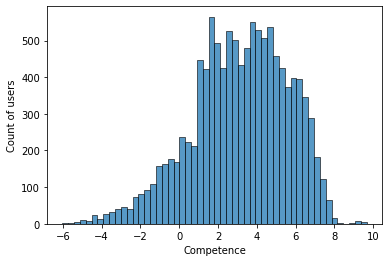

In [5]:
# plot histogram
gr = sns.histplot(data=final, x="ability")
gr.set(xlabel ="Competence", ylabel = "Count of users")

Get Effect sizes

In [6]:
# per Interventiongroup
ability_by_group = final.groupby(['interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})

In [7]:
# Gender
ability_by_group = final.groupby(['Geschlecht','interventiongroup']).agg({'ability':'median','Klassenstufe':'count'})
ability_by_group = ability_by_group.rename(columns={'Klassenstufe':'count'})

In [8]:
# Class level
ability_by_group = final.groupby(['Klassenstufe','interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})

Test significance

In [9]:
# Kruskal Wallis Test 
stats.kruskal(intvcontrol['ability'], intv2['ability'], intv3['ability'],intv4['ability'],intv5['ability'],intv6['ability'])

KruskalResult(statistic=68.42835525597266, pvalue=2.1754129401419514e-13)

In [10]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol['ability'], intv2['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv3['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv4['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv5['ability']))
print(stats.mannwhitneyu(intvcontrol['ability'], intv6['ability']))

MannwhitneyuResult(statistic=2177102.0, pvalue=0.4901414595379354)
MannwhitneyuResult(statistic=2303176.5, pvalue=0.3242020894809332)
MannwhitneyuResult(statistic=2316684.0, pvalue=0.05688259442550231)
MannwhitneyuResult(statistic=2416178.0, pvalue=4.803104717946944e-14)
MannwhitneyuResult(statistic=2102348.5, pvalue=0.04426148549708299)


[Text(0.5, 0, 'Competence'), Text(0, 0.5, 'Intervention group')]

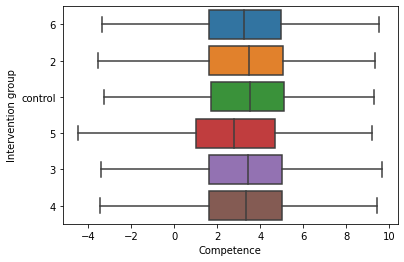

In [11]:
# plot boxplot interventiongroup
gr=sns.boxplot(data=final, x="ability", y="interventiongroup",showfliers = False)#,hue='Geschlecht'
gr.set(xlabel ="Competence", ylabel = "Intervention group")


<AxesSubplot:xlabel='ability', ylabel='Geschlecht'>

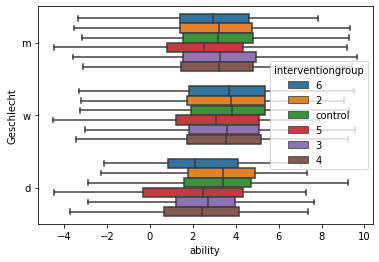

In [12]:
# plot boxplot interventiongroup / gender
sns.boxplot(data=final, x="ability", hue="interventiongroup",y='Geschlecht',showfliers = False)

Gender Demographics

In [13]:
# split
final_m = final.loc[final.Geschlecht == 'm']
final_w = final.loc[final.Geschlecht == 'w']
final_d = final.loc[final.Geschlecht == 'd']

Boys

In [14]:
# split boys by interventiongroup
intvcontrol_m = final_m[(final_m['interventiongroup']=='control')]
intv2_m = final_m[(final_m['interventiongroup']=='2')]
intv3_m = final_m[(final_m['interventiongroup']=='3')]
intv4_m = final_m[(final_m['interventiongroup']=='4')]
intv5_m = final_m[(final_m['interventiongroup']=='5')]
intv6_m = final_m[(final_m['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_m['ability'], intv2_m['ability'], intv3_m['ability'],intv4_m['ability'],intv5_m['ability'],intv6_m['ability'])

KruskalResult(statistic=38.85211387338328, pvalue=2.5432880459243695e-07)

In [15]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv2_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv3_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv4_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv5_m['ability']))
print(stats.mannwhitneyu(intvcontrol_m['ability'], intv6_m['ability']))

MannwhitneyuResult(statistic=484045.0, pvalue=0.6088390715806091)
MannwhitneyuResult(statistic=485860.0, pvalue=0.7678848163926204)
MannwhitneyuResult(statistic=523585.0, pvalue=0.8520310900070037)
MannwhitneyuResult(statistic=549583.5, pvalue=1.2807539080813606e-07)
MannwhitneyuResult(statistic=480387.5, pvalue=0.15075603284341382)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

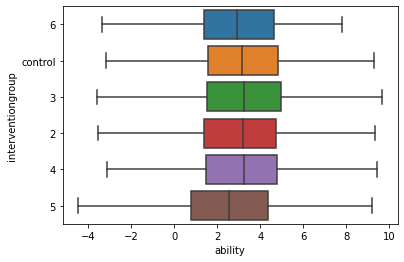

In [16]:
# plot ability and interventiongroup
sns.boxplot(data=final_m, x="ability", y="interventiongroup",showfliers = False)

Girls

In [17]:
# split girls by interventiongroup
intvcontrol_w = final_w[(final_w['interventiongroup']=='control')]
intv2_w = final_w[(final_w['interventiongroup']=='2')]
intv3_w = final_w[(final_w['interventiongroup']=='3')]
intv4_w = final_w[(final_w['interventiongroup']=='4')]
intv5_w = final_w[(final_w['interventiongroup']=='5')]
intv6_w = final_w[(final_w['interventiongroup']=='6')]

# Kruskal Wallis Test 
stats.kruskal(intvcontrol_w['ability'], intv2_w['ability'], intv3_w['ability'],intv4_w['ability'],intv5_w['ability'],intv6_w['ability'])

KruskalResult(statistic=29.69388088317724, pvalue=1.6942336948528677e-05)

In [18]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv2_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv3_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv4_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv5_w['ability']))
print(stats.mannwhitneyu(intvcontrol_w['ability'], intv6_w['ability']))


MannwhitneyuResult(statistic=542930.0, pvalue=0.6320966790461168)
MannwhitneyuResult(statistic=592142.0, pvalue=0.1478404259953352)
MannwhitneyuResult(statistic=557917.0, pvalue=0.04773313899388537)
MannwhitneyuResult(statistic=574116.0, pvalue=7.899101928992461e-07)
MannwhitneyuResult(statistic=486977.0, pvalue=0.5151053109167599)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

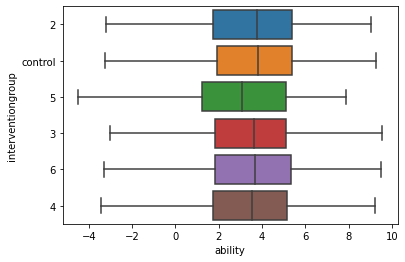

In [19]:
# plot boxplot ability and interventiongroup
sns.boxplot(data=final_w, x="ability", y="interventiongroup",showfliers = False)

Divers

In [20]:
# intvcontrol_d = final_d[(final_d['interventiongroup']=='control')]
# intv2_d = final_d[(final_d['interventiongroup']=='2')]
# intv3_d = final_d[(final_d['interventiongroup']=='3')]
# intv4_d = final_d[(final_d['interventiongroup']=='4')]
# intv5_d = final_d[(final_d['interventiongroup']=='5')]
# intv6_d = final_d[(final_d['interventiongroup']=='6')]

# # Kruskal Wallis Test 
# stats.kruskal(intvcontrol_d['ability'], intv2_d['ability'], intv3_d['ability'],intv4_d['ability'],intv5_d['ability'],intv6_d['ability'])

# #Wilcoxon Mann Whitney Test
# print(stats.mannwhitneyu(intvcontrol_d['ability'], intv2_d['ability']))
# print(stats.mannwhitneyu(intvcontrol_d['ability'], intv3_d['ability']))
# print(stats.mannwhitneyu(intvcontrol_d['ability'], intv4_d['ability']))
# print(stats.mannwhitneyu(intvcontrol_d['ability'], intv5_d['ability']))
# print(stats.mannwhitneyu(intvcontrol_d['ability'], intv6_d['ability']))

# sns.boxplot(data=final_d, x="ability", y="interventiongroup",showfliers = False)

Demographics class level

In [21]:
# split by class level
final_5 = final.loc[final.Klassenstufe == '5']
final_6 = final.loc[final.Klassenstufe == '6']
final_7 = final.loc[final.Klassenstufe == '7']
final_8 = final.loc[final.Klassenstufe == '8']
final_9 = final.loc[final.Klassenstufe == '9']
final_10 = final.loc[final.Klassenstufe == '10']
final_11 = final.loc[final.Klassenstufe == '11']
final_12 = final.loc[final.Klassenstufe == '12']
final_13 = final.loc[final.Klassenstufe == '13']

klassenliste = [final_5, final_6, final_7, final_8, final_9, final_10, final_11, final_12, final_13]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    # Kruskal Wallis Test 
    print(stats.kruskal(intvcontrol['ability'], intv2['ability'], intv3['ability'],intv4['ability'],intv5['ability'],intv6['ability']))

KruskalResult(statistic=18.941556628871496, pvalue=0.0019709132854136054)
KruskalResult(statistic=11.063111904359271, pvalue=0.0501429200245541)
KruskalResult(statistic=14.359948055543853, pvalue=0.013477616663149497)
KruskalResult(statistic=34.317472315134545, pvalue=2.058415831860308e-06)
KruskalResult(statistic=16.966379449667162, pvalue=0.00456400260475576)
KruskalResult(statistic=7.906502659980139, pvalue=0.16146428431752438)
KruskalResult(statistic=9.997036971576403, pvalue=0.07531924578631882)
KruskalResult(statistic=3.7100836153077337, pvalue=0.5918640871531279)
KruskalResult(statistic=2.478880645215508, pvalue=0.7796722749023791)


In [22]:
# carry out wilcoxon mann whitney test for significant classes
klassenliste = [final_5, final_7, final_8, final_9]

for x in klassenliste:
    intvcontrol = x[(x['interventiongroup']=='control')]
    intv2 = x[(x['interventiongroup']=='2')]
    intv3 = x[(x['interventiongroup']=='3')]
    intv4 = x[(x['interventiongroup']=='4')]
    intv5 = x[(x['interventiongroup']=='5')]
    intv6 = x[(x['interventiongroup']=='6')]

    #Wilcoxon Mann Whitney Test
    print(stats.mannwhitneyu(intvcontrol['ability'], intv2['ability']))
    print(stats.mannwhitneyu(intvcontrol['ability'], intv3['ability']))
    print(stats.mannwhitneyu(intvcontrol['ability'], intv4['ability']))
    print(stats.mannwhitneyu(intvcontrol['ability'], intv5['ability']))
    print(stats.mannwhitneyu(intvcontrol['ability'], intv6['ability']))
    print('--------------')

MannwhitneyuResult(statistic=23310.5, pvalue=0.9043291027242265)
MannwhitneyuResult(statistic=21575.0, pvalue=0.2810393275220361)
MannwhitneyuResult(statistic=21793.5, pvalue=0.020268908504160337)
MannwhitneyuResult(statistic=22462.5, pvalue=0.042502187543685434)
MannwhitneyuResult(statistic=23268.0, pvalue=0.4630518044121733)
--------------
MannwhitneyuResult(statistic=53944.5, pvalue=0.937394853840652)
MannwhitneyuResult(statistic=59483.0, pvalue=0.850693306490651)
MannwhitneyuResult(statistic=75357.0, pvalue=0.27191875772398943)
MannwhitneyuResult(statistic=78547.5, pvalue=0.0011910703613067148)
MannwhitneyuResult(statistic=60830.5, pvalue=0.8135283917310682)
--------------
MannwhitneyuResult(statistic=76414.5, pvalue=0.8535802046086788)
MannwhitneyuResult(statistic=90111.0, pvalue=0.5431001182023373)
MannwhitneyuResult(statistic=76878.0, pvalue=0.9685345670819862)
MannwhitneyuResult(statistic=87100.5, pvalue=4.363054633575577e-07)
MannwhitneyuResult(statistic=71653.0, pvalue=0.9051

In [23]:
# plot boxplots for significant groups

AxesSubplot(0.125,0.125;0.775x0.755)


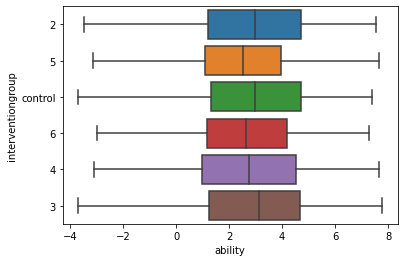

In [24]:
print(sns.boxplot(data=final_6, x="ability", y="interventiongroup",showfliers = False))

AxesSubplot(0.125,0.125;0.775x0.755)


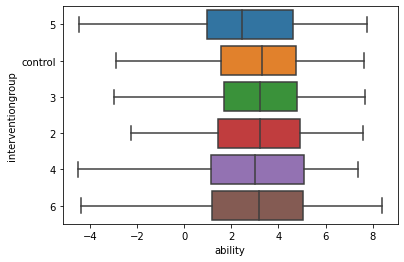

In [25]:
print(sns.boxplot(data=final_7, x="ability", y="interventiongroup",showfliers = False))

AxesSubplot(0.125,0.125;0.775x0.755)


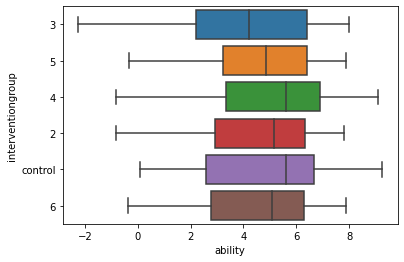

In [26]:
print(sns.boxplot(data=final_12, x="ability", y="interventiongroup",showfliers = False))